In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Read the csv file into a pandas DataFrame
filepath=os.path.join("..","..","Resources","RT_OUTPUT_DATA.csv")
df = pd.read_csv(filepath)
df.head(20)

,Instructor Name (encoded),Instructor ID,Learning Assignment: Completed On,Learning Assignment: Learning Plan: Learning Plan Name,Learning Assignment: Times Launched,Learning Assignment: Learning Plan Section: Learning Plan Section Name,Question Number,Question Text,Response Text Long,Taught in Last 12 Months,...,clean_response,response_text_scores,clean_response_negative,clean_response_neutral,clean_response_positive,clean_response_compound,tokenized_words,tokenized_word_count,filtered_words,filtered_word_count
0,11r4n0T5ck2r,577,44228,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,answer questions in the chat,True,...,answer questions in the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['answer', 'questions', 'in', 'the', 'chat']",5,"['answer', 'questions', 'chat']",3
1,12r3c0S4l4w,591,44149,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chats and students.,True,...,monitor chats and students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['monitor', 'chats', 'and', 'students']",4,"['monitor', 'chats', 'students']",3
2,1l2ks1ndr10Mrt2nss4n,605,44145,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,monitor questions from students,True,...,monitor questions from students,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['monitor', 'questions', 'from', 'students']",4,"['monitor', 'questions', 'students']",3
3,1l2x0Cr5z,618,44250,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Monitor chat,True,...,monitor chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['monitor', 'chat']",2,"['monitor', 'chat']",2
4,1l2x1ndr10R1tt16,612,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,Moderate the chat,True,...,moderate the chat,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['moderate', 'the', 'chat']",3,"['moderate', 'chat']",2
5,1l30B2nt1l2b,627,44200,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,manage the hat questions and helps needed,True,...,manage the hat questions and helps needed,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.000,0.698,0.302,0.3818,"['manage', 'the', 'hat', 'questions', 'and', '...",7,"['manage', 'hat', 'questions', 'helps', 'needed']",5
6,1lfr2d40Jr020Fl4r2s,440,44130,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,"Monitoring the time, parking lot questions, re...",True,...,monitoring the time parking lot questions remi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,"['monitoring', 'the', 'time', 'parking', 'lot'...",17,"['monitoring', 'time', 'parking', 'lot', 'ques...",12
7,1m3t0B5t13l,499,44163,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,The Breakout sessions and helping in the activ...,True,...,the breakout sessions and helping in the activ...,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",0.000,0.761,0.239,0.2960,"['the', 'breakout', 'sessions', 'and', 'helpin...",8,"['breakout', 'sessions', 'helping', 'activities']",4
8,1m60St3n61rd,457,44134,SAFe Remote Trainer,1,Lesson 2 - Preparing for Remote Training,13.0,What is one activity your co-trainer can do to...,A co-trainer can watch for Q&A as they are typ...,True,...,a cotrainer can watch for qa as they are typed...,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.000,0.909,0.091,0.3612,"['a', 'cotrainer', 'can', 'watch', 'for', 'qa'...",27,"['cotrainer', 'watch', 'qa', 'typed', 

In [3]:
list(df)

['Instructor Name (encoded)',
 'Instructor ID',
 'Learning Assignment: Completed On',
 'Learning Assignment: Learning Plan: Learning Plan Name',
 'Learning Assignment: Times Launched',
 'Learning Assignment: Learning Plan Section: Learning Plan Section Name',
 'Question Number',
 'Question Text',
 'Response Text Long',
 'Taught in Last 12 Months',
 'Avg. Score - Knowledge of the course content',
 'Avg. Score - Training and facilitation skills',
 'Number of Classes Taught',
 'Number of Attendees',
 'COUNT NAME',
 'CLEAN',
 'response_lower_case',
 'clean_response',
 'response_text_scores',
 'clean_response_negative',
 'clean_response_neutral',
 'clean_response_positive',
 'clean_response_compound',
 'tokenized_words',
 'tokenized_word_count',
 'filtered_words',
 'filtered_word_count']

In [4]:
# Assign the data to X and y

# X = df[["filtered_word_count"]]
X = df[["clean_response_compound", "tokenized_word_count","filtered_word_count"]]
y = df["Avg. Score - Training and facilitation skills"].values.reshape(-1, 1)
print(X.shape, y.shape)

(304, 3) (304, 1)


In [5]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [6]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [7]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.04229882184490452
Testing Score: 0.009366503132730686


Text(0.5, 1.0, 'Residual Plot')

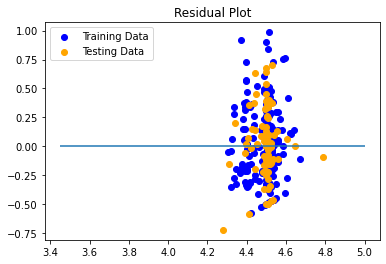

In [8]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION